In [14]:
# Import modules
import os
import settings.input
import settings.initialize

# Reload local modules (for testing)
import imp
imp.reload(settings.input)
imp.reload(settings.initialize)

<module 'settings.initialize' from '/Users/shiraz/repos/sensor-network-sim/settings/initialize.py'>

In [15]:
# Get input files
simulation_file = os.path.join("settings","json_files", "simulation",  "ICF-sim.json")
sensor_network_file = os.path.join("settings","json_files", "sensor_network",  "ICF-sensor-network.json")

# Read input files
raw_data = settings.input.read_configs([simulation_file, sensor_network_file])
input_data  = settings.initialize.do_everything(raw_data)

In [16]:
import sim.target
import sim.network
import sim.history

# Reload local modules (for testing)
import imp
imp.reload(sim.target)
imp.reload(sim.network)
imp.reload(sim.history)

<module 'sim.history' from '/Users/shiraz/repos/sensor-network-sim/sim/history.py'>

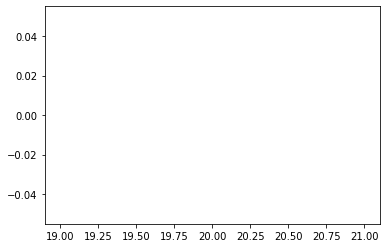

In [33]:
target = sim.target.create(input_data)
network = sim.network.create(input_data)

sim_history = sim.history.create(network)

for t in range(1):
    sim_history.add(target_x=target.x)
    network.make_measurements(target.x)
    
    # Do estimation here
    
    target.update()

sim_history.plot_xy(estimates=False)

In [35]:
for sensor in network.sensors.values():
    print(sensor.neighbors)

AttributeError: 'Sensor' object has no attribute 'neighbors'

In [23]:
target.x

array([[-9.0859526 ],
       [21.87574001]])

In [24]:
input_data


{'scheme': 'KCF-BWG',
 'network': {'adjacency': [[1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1],
   [1, 1, 1, 1, 1],
   [1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1]],
  'n_sensors': 5,
  'observability': [[[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[0.5, 0], [0, 1.1]],
   [[1, 0], [0, 1]]],
  'noise': [[[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[1, 0], [0, 1]],
   [[4, 0], [0, 4]],
   [[1, 0], [0, 1]]]},
 'simulation': {'total_steps': 1000},
 'target': {'constraints': {'x_initial': [20, 0]},
  'state': {'ss_A': array([[ 0.99987663, -0.01570732],
          [ 0.01570732,  0.99987663]]), 'ss_B': array([[1, 0],
          [0, 1]]), 'dimension': 2},
  'noise': [[1, 0], [0, 1]]}}